In [1]:
# this file takes in all files and produce the appropriate s2d analysis
from pathlib import Path
from datasets import load_dataset
from evaluate import load
import pandas as pd
import numpy as np
from pathlib import Path
from functional import seq
from funcutils import underscore as _
from funcutils import get
from IPython.display import display, display_html, HTML
from editdistance import distance as edit_distance

import matplotlib.pyplot as plt
from sys import argv

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
dspl_html = lambda x: display_html(x, raw=True)
rouge = load('rouge')
print(argv)

['/home/vente/.conda/envs/nlgs/lib/python3.9/site-packages/ipykernel_launcher.py', '--f=/home/vente/.local/share/jupyter/runtime/kernel-v2-5527821k5dmi8o33pB.json']


In [3]:
index = int(argv[1]) if len(argv) == 2 and argv[1].isnumeric() else 1
root_path = Path("/home/vente/repos/nlgs-research")
pkl = (
  list( (root_path / "pipeline/predictions").glob("*s2d*")) +
  list( (root_path / "pipeline/predictions").glob("*mt*" ))
)[index]
print(pkl.name)
test_predictions = pd.read_pickle(pkl)
if 'task' in test_predictions.columns:
  test_predictions = test_predictions[test_predictions.task == 's2d']
test_predictions

s2d-t5-base-5.pkl


,record_idx,seed_number,subset,category,split_index,sd,nl,task,input_ids,attention_mask,labels,pred_ids,decoded
38668,14495,0,test,Airport,0,"Abilene Regional Airport|city served|Abilene, ...","Abilene, Texas is served by the Abilene region...",s2d,"[891, 23, 14205, 6, 2514, 19, 2098, 57, 8, 891...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[891, 23, 14205, 7676, 5735, 9175, 6726, 2098,...","[0, 891, 23, 14205, 7676, 5735, 9175, 6726, 20...","Abilene Regional Airport|city served|Abilene, ..."
38669,14495,1,test,Airport,0,"Abilene Regional Airport|city served|Abilene, ...",Abilene Regional Airport serves the city of Ab...,s2d,"[891, 23, 14205, 7676, 5735, 4657, 8, 690, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[891, 23, 14205, 7676, 5735, 9175, 6726, 2098,...","[0, 891, 23, 14205, 7676, 5735, 9175, 6726, 20...","Abilene Regional Airport|city served|Abilene, ..."
38670,14496,0,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,Adolfo Suarez Madrid-Barajas Airport can be fo...,s2d,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...
38671,14496,1,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,Adolfo Suarez Madrid-Barajas airport is locate...,s2d,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...
38672,14496,2,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,Adolfo Suarez Madrid-Barajas Airport is locate...,s2d,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42887,16092,1,test,University,1597,School of Business and Social Sciences at the ...,"Established in 1928, the School of Business an...",s2d,"[25275, 16, 29004, 6, 8, 1121, 13, 1769, 11, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...
42888,16093,0,test,University,1598,School of Business and Social Sciences at the ...,Denmark is led by the Monarchy of Demark and t...,s2d,"[18001, 19, 2237, 57, 8, 2963, 7064, 63, 13, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 18001, 9175, 22900, 564, 9175, 434, 291, 7...",Denmark|leader name|Lars Lokke Rasmussen; Scho...
42889,16093,1,test,University,1598,School of Business and Social Sciences at the ...,The School of Business and Social Sciences at ...,s2d,"[37, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 18001, 9175, 22900, 564, 9175, 434, 291, 7...",Denmark|leader name|Lars Lokke Rasmussen; Scho...
42890,16093,2,test,University,1598,School of Business and Social Sciences at the ...,The School of Business and Social Sciences at ...,s2d,"[37, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 18001, 9175, 22900, 564, 9175, 434, 291, 7...",Denmark|leader name|Lars Lokke Rasmussen; Scho...


In [4]:
index = int(argv[1]) if len(argv) == 2 and argv[1].isnumeric() else 1
root_path = Path("/home/vente/repos/nlgs-research")
pkl = (
  list( (root_path / "pipeline/predictions").glob("*s2d*")) +
  list( (root_path / "pipeline/predictions").glob("*mt*" ))
)[index]
print(pkl.name)

s2d-t5-base-5.pkl


In [5]:
index = int(argv[1]) if len(argv) == 2 and argv[1].isnumeric() else 2
root_path = Path("/home/vente/repos/nlgs-research")
pkl = (
  list( (root_path / "pipeline/predictions").glob("*s2d*")) +
  list( (root_path / "pipeline/predictions").glob("*mt*" ))
)[index]
print(pkl.name)

mt-t5-small-5-multicorp.pkl


In [6]:
test_predictions = pd.read_pickle(pkl)
if 'task' in test_predictions.columns:
  test_predictions = test_predictions[test_predictions.task == 's2d']
test_predictions

,record_idx,seed_number,subset,category,split_index,sd,nl,task,input_ids,attention_mask,labels,pred_ids,decoded
86,15192,0,test,Airport,697,s2d 0: Andrews County Airport|location|Texas; ...,The runway length at Andrews County airport ( ...,s2d,"[37, 22750, 2475, 44, 5954, 7, 1334, 3761, 41,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 5954, 7, 1334, 573...","[0, 3, 7, 357, 26, 209, 10, 5954, 7, 1334, 573...",s2d 1: Andrews County Airport|location|Texas; ...
88,15192,1,test,Airport,697,s2d 1: Andrews County Airport|location|Texas; ...,"Located in Texas, Andrews County Airport, is 9...",s2d,"[3, 8691, 16, 2514, 6, 5954, 7, 1334, 5735, 6,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 209, 10, 5954, 7, 1334, 5735, ...","[0, 3, 7, 357, 26, 209, 10, 5954, 7, 1334, 573...",s2d 1: Andrews County Airport|location|Texas; ...
90,15192,2,test,Airport,697,s2d 2: Andrews County Airport|location|Texas; ...,Andrews County Airport is located in Texas and...,s2d,"[5954, 7, 1334, 5735, 19, 1069, 16, 2514, 11, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 204, 10, 5954, 7, 1334, 5735, ...","[0, 3, 7, 357, 26, 209, 10, 5954, 7, 1334, 573...",s2d 1: Andrews County Airport|location|Texas; ...
110,14857,0,test,WrittenWork,362,s2d 0: 1634: The Ram Rebellion|author|Eric Flint,Eric Flint is the author of 1634: The Ram Rebe...,s2d,"[6964, 29612, 19, 8, 2291, 13, 898, 3710, 10, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 898, 3710, 10, 37,...","[0, 3, 7, 357, 26, 209, 10, 898, 3710, 10, 37,...",s2d 1: 1634: The Ram Rebellion|author|Eric Flint
112,14857,1,test,WrittenWork,362,s2d 1: 1634: The Ram Rebellion|author|Eric Flint,"Eric Flint wrote the book ""1634: The Ram Rebel...",s2d,"[6964, 29612, 2832, 8, 484, 96, 2938, 3710, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 209, 10, 898, 3710, 10, 37, 44...","[0, 3, 7, 357, 26, 209, 10, 898, 3710, 10, 37,...",s2d 1: 1634: The Ram Rebellion|author|Eric Flint
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94696,14839,0,test,SportsTeam,344,s2d 0: Jens Hartel|club|FC Sachsen Leipzig,Jens Hartel has represented the club FC Sachse...,s2d,"[9101, 7, 3504, 1625, 65, 7283, 8, 1886, 7914,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...","[3, 7, 357, 26, 3, 632, 10, 9101, 7, 3504, 162...","[0, 3, 7, 357, 26, 209, 10, 9101, 7, 3504, 162...",s2d 1: Jens Hartel|club|FC Sachsen Leipzig
94698,14839,1,test,SportsTeam,344,s2d 1: Jens Hartel|club|FC Sachsen Leipzig,Jens Hartel played for FC Sachsen Leipzig.,s2d,"[9101, 7, 3504, 1625, 1944, 21, 7914, 29234, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[3, 7, 357, 26, 209, 10, 9101, 7, 3504, 1625, ...","[0, 3, 7, 357, 26, 209, 10, 9101, 7, 3504, 162...",s2d 1: Jens Hartel|club|FC Sachsen Leipzig
94702,15119,0,test,Politician,624,"s2d 0: Alberto Teisaire|office (worked at, wor...",Alberto Teisaire worked as the Provisional Pre...,s2d,"[11375, 32, 2255, 159, 2378, 1279, 38, 8, 2800...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 11375, 32, 2255, 1...","[0, 3, 7, 357, 26, 209, 10, 11375, 32, 2255, 1...","s2d 1: Alberto Teisaire|office (worked at, wor..."
94704,15119,1,test,Politician,624,"s2d 1: Alberto Teisaire|office (worked at, wor...",Alberto Teisaire worked as a Provisional Presi...,s2d,"[11375, 32, 2255, 159, 2378, 1279, 38, 3, 9, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 209, 10, 11375, 32, 2255, 159,...","[0, 3, 7, 357, 26, 209, 10, 11375, 32, 2255, 1...","s2d 1: Alberto Teisaire|office (worked at, wor..."


In [7]:
OUTPUT_PATH = Path("/home/vente/repos/nlgs-research/pipeline/scores") / pkl.name.removesuffix(".pkl")
OUTPUT_PATH.mkdir(exist_ok=True)
OUTPUT_PATH

PosixPath('/home/vente/repos/nlgs-research/pipeline/scores/mt-t5-small-5-multicorp')

 How do we formulate F-measure for this task? Usually there is a fixed number
 of classes, and one label per class. But this class is fundimentally about
 extracting many labels from a single sequence.
 Approach: treat one data sample as multiple classification events, compute the
 f-measure across each label in an needs to be order-insensitive by comparing
 the sets themselves

 ```
 TP <- PRED `intersect` GT |> length
 FP <- PRED - GT |> length
 FN <- GT - PRED |> length
 prec <- TP / (TP + FP)
 recl <- TP / (TP + FN)
 F1 <- harmonic_mean(prec, recl)
 ```

In [8]:
# define set notion of precision when multiple labels are assigned
# to a single instance, with epsilon preventing div by zero
def compute_f_measure(pred: set[str], gt: set[str], epsilon=1e-99):
    tp = len(pred.intersection(gt)) # pred true and actually true
    fp = len(pred - gt)             # in pred but not in gt
    fn = len(gt - pred)             # not in pred but actualy true

    prec = tp / (tp + fp + epsilon) 
    recl = tp / (tp + fn + epsilon) 
    f1 = (2 * prec * recl) / (prec + recl + epsilon)
    return f1

 ## Unit Tests

In [9]:
assert compute_f_measure(set("a"), set('a')) == 1
assert compute_f_measure(set("ab"), set('a')) == 2/3
assert compute_f_measure(set() , set('a')) == 0

In [10]:
# don't penalize for quotes or spaces
norm_split_set = lambda x: (
  x.str.upper()
   .str.replace("S2D.\\d:", '', regex=True)
   .str.replace("'", '')
   .str.replace(' ','')
   .map(_.split(";"))
   .map(set)
)
y_pred = norm_split_set(test_predictions['decoded'])
y_pred

86       {ANDREWSCOUNTYAIRPORT|RUNWAYLENGTH|1773.0, AND...
88       {ANDREWSCOUNTYAIRPORT|ELEVATIONABOVETHESEALEVE...
90       {ANDREWSCOUNTYAIRPORT|RUNWAYLENGTH|1773.0, AND...
110                {1634:THERAMREBELLION|AUTHOR|ERICFLINT}
112                {1634:THERAMREBELLION|AUTHOR|ERICFLINT}
                               ...                        
94696                   {JENSHARTEL|CLUB|FCSACHSENLEIPZIG}
94698                   {JENSHARTEL|CLUB|FCSACHSENLEIPZIG}
94702    {ALBERTOTEISAIRE|OFFICE(WORKEDAT,WORKEDAS)|PRO...
94704    {ALBERTOTEISAIRE|OFFICE(WORKEDAT,WORKEDAS)|PRO...
94706    {ALBERTOTEISAIRE|OFFICE(WORKEDAT,WORKEDAS)|PRO...
Name: decoded, Length: 4224, dtype: object

In [11]:
y_true = norm_split_set(test_predictions['sd'])
y_true

86       {ANDREWSCOUNTYAIRPORT|RUNWAYLENGTH|1773.0, AND...
88       {ANDREWSCOUNTYAIRPORT|RUNWAYLENGTH|1773.0, AND...
90       {ANDREWSCOUNTYAIRPORT|RUNWAYLENGTH|1773.0, AND...
110                {1634:THERAMREBELLION|AUTHOR|ERICFLINT}
112                {1634:THERAMREBELLION|AUTHOR|ERICFLINT}
                               ...                        
94696                   {JENSHARTEL|CLUB|FCSACHSENLEIPZIG}
94698                   {JENSHARTEL|CLUB|FCSACHSENLEIPZIG}
94702    {ALBERTOTEISAIRE|OFFICE(WORKEDAT,WORKEDAS)|PRO...
94704    {ALBERTOTEISAIRE|OFFICE(WORKEDAT,WORKEDAS)|PRO...
94706    {ALBERTOTEISAIRE|OFFICE(WORKEDAT,WORKEDAS)|PRO...
Name: sd, Length: 4224, dtype: object

In [12]:
f1_scores = seq(y_pred).zip(y_true).starmap(compute_f_measure).to_list()
seq(f1_scores).take(10)

[1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 0.888888888888889, 0.6666666666666665, 0.6666666666666665, 0.5]

In [13]:
def comptute_edit_distances(y_pred, y_true):
    # the arguments are sets of strings
    # to find the closest edit distances
    # take the cartesian product and limit
    # this works since y_pred and y_true do not contain duplicates
    # note that this penalizes for longer sequences
    return (
      seq(y_pred)
        .cartesian(y_true)
        .starmap(edit_distance) 
        .sorted()
        .to_list()
    )

edit_distances = (
  seq(y_pred)
    .zip(y_true)
    .starmap(comptute_edit_distances)
    .map(np.mean)
    .to_list()
)
seq(edit_distances).take(10)

[17.555555555555557, 17.77777777777778, 17.555555555555557, 0.0, 0.0, 0.0, 21.25, 21.4, 22.25, 13.0]

In [14]:
results = test_predictions
results['f1_scores'] = f1_scores
results['med_scores'] = edit_distances # med mean edit distance
results 

,record_idx,seed_number,subset,category,split_index,sd,nl,task,input_ids,attention_mask,labels,pred_ids,decoded,f1_scores,med_scores
86,15192,0,test,Airport,697,s2d 0: Andrews County Airport|location|Texas; ...,The runway length at Andrews County airport ( ...,s2d,"[37, 22750, 2475, 44, 5954, 7, 1334, 3761, 41,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 5954, 7, 1334, 573...","[0, 3, 7, 357, 26, 209, 10, 5954, 7, 1334, 573...",s2d 1: Andrews County Airport|location|Texas; ...,1.000000,17.555556
88,15192,1,test,Airport,697,s2d 1: Andrews County Airport|location|Texas; ...,"Located in Texas, Andrews County Airport, is 9...",s2d,"[3, 8691, 16, 2514, 6, 5954, 7, 1334, 5735, 6,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 209, 10, 5954, 7, 1334, 5735, ...","[0, 3, 7, 357, 26, 209, 10, 5954, 7, 1334, 573...",s2d 1: Andrews County Airport|location|Texas; ...,0.666667,17.777778
90,15192,2,test,Airport,697,s2d 2: Andrews County Airport|location|Texas; ...,Andrews County Airport is located in Texas and...,s2d,"[5954, 7, 1334, 5735, 19, 1069, 16, 2514, 11, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 204, 10, 5954, 7, 1334, 5735, ...","[0, 3, 7, 357, 26, 209, 10, 5954, 7, 1334, 573...",s2d 1: Andrews County Airport|location|Texas; ...,1.000000,17.555556
110,14857,0,test,WrittenWork,362,s2d 0: 1634: The Ram Rebellion|author|Eric Flint,Eric Flint is the author of 1634: The Ram Rebe...,s2d,"[6964, 29612, 19, 8, 2291, 13, 898, 3710, 10, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 898, 3710, 10, 37,...","[0, 3, 7, 357, 26, 209, 10, 898, 3710, 10, 37,...",s2d 1: 1634: The Ram Rebellion|author|Eric Flint,1.000000,0.000000
112,14857,1,test,WrittenWork,362,s2d 1: 1634: The Ram Rebellion|author|Eric Flint,"Eric Flint wrote the book ""1634: The Ram Rebel...",s2d,"[6964, 29612, 2832, 8, 484, 96, 2938, 3710, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 209, 10, 898, 3710, 10, 37, 44...","[0, 3, 7, 357, 26, 209, 10, 898, 3710, 10, 37,...",s2d 1: 1634: The Ram Rebellion|author|Eric Flint,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94696,14839,0,test,SportsTeam,344,s2d 0: Jens Hartel|club|FC Sachsen Leipzig,Jens Hartel has represented the club FC Sachse...,s2d,"[9101, 7, 3504, 1625, 65, 7283, 8, 1886, 7914,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...","[3, 7, 357, 26, 3, 632, 10, 9101, 7, 3504, 162...","[0, 3, 7, 357, 26, 209, 10, 9101, 7, 3504, 162...",s2d 1: Jens Hartel|club|FC Sachsen Leipzig,1.000000,0.000000
94698,14839,1,test,SportsTeam,344,s2d 1: Jens Hartel|club|FC Sachsen Leipzig,Jens Hartel played for FC Sachsen Leipzig.,s2d,"[9101, 7, 3504, 1625, 1944, 21, 7914, 29234, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[3, 7, 357, 26, 209, 10, 9101, 7, 3504, 1625, ...","[0, 3, 7, 357, 26, 209, 10, 9101, 7, 3504, 162...",s2d 1: Jens Hartel|club|FC Sachsen Leipzig,1.000000,0.000000
94702,15119,0,test,Politician,624,"s2d 0: Alberto Teisaire|office (worked at, wor...",Alberto Teisaire worked as the Provisional Pre...,s2d,"[11375, 32, 2255, 159, 2378, 1279, 38, 8, 2800...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 11375, 32, 2255, 1...","[0, 3, 7, 357, 26, 209, 10, 11375, 32, 2255, 1...","s2d 1: Alberto Teisaire|office (worked at, wor...",1.000000,27.000000
94704,15119,1,test,Politician,624,"s2d 1: Alberto Teisaire|office (worked at, wor...",Alberto Teisaire worked as a Provisional Presi...,s2d,"[11375, 32, 2255, 159, 2378, 1279, 38, 3, 9, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 209, 10, 11375, 32, 2255, 159,...","[0, 3, 7, 357, 26, 209, 10, 11375, 32, 2255, 1...","s2d 1: Alberto Teisaire|office (worked at, wor...",1.000000,27.000000


In [15]:
# let's define nth finish and "place-number" as 0 for "finishing in first place"
# give find the place-number given a score: ties should have the same place
score_to_nth_finish: dict[float, int]= (
  seq(f1_scores)
    .sorted(reverse=True) # Highest to lowest
    .zip_with_index()     # gives an over-estimate of nth-finish
    .group_by(get[0])     # so we group by the f1 scores
    .map(get[1])          # then we get the actual place of the score
    .map(get[0])          # it's sorted, so take the first to account for ties
    .to_dict()            # convert to dictionary
)
seq(score_to_nth_finish.items()).to_pandas()

,0,1
0,1.000000,0
1,0.923077,2006
2,0.909091,2019
3,0.888889,2029
4,0.857143,2163
5,0.833333,2284
6,0.833333,2296
7,0.800000,2304
8,0.800000,2416
9,0.769231,2501


 ## Error analysis

In [16]:
results['y_pred']  = y_pred
results['y_true']  = y_true
results['y_len']  = y_true.map(len)
results['nth_finish'] = results['f1_scores'].map(score_to_nth_finish)
results['nth_finish'] 

86          0
88       2738
90          0
110         0
112         0
         ... 
94696       0
94698       0
94702       0
94704       0
94706       0
Name: nth_finish, Length: 4224, dtype: int64

In [17]:
worst_finishes = results[results.f1_scores == 0]
dspl_html(worst_finishes[['med_scores','f1_scores', 'y_pred','y_true']].to_html())
print(len(worst_finishes))

,med_scores,f1_scores,y_pred,y_true
674,19.000000,0.0,{BENURICH|CREATOR|ROGERMCKENZIE(COMICSCHARACTER)},"{BENURICH|FULLNAME|BENJAMINURICH, BENURICH|CREATOR|ROGERMCKENZIE(COMICBOOKWRITER)}"
922,8.000000,0.0,{A.F.C.BLACKPOOL|LOCATION|BLACKPOOL},{A.F.C.BLACKPOOL|GROUND|BLACKPOOL}
1304,26.833333,0.0,"{ALBERTUDERZO|NATIONALITY|FRENCH, ASTERIX|CREATOR|RENEGOSCINNY}","{ASTERIX(COMICSCHARACTER)|CREATOR|RENEGOSCINNY, ASTERIX(COMICSCHARACTER)|CREATOR|ALBERTUDERZO, RENEGOSCINNY|NATIONALITY|FRENCHPEOPLE}"
1440,13.750000,0.0,"{ASLIVORNO|LEAGUE|SERIEB, ASLIVORNO|GROUND|LIVORNO}","{A.S.LIVORNOCALCIO|GROUND|LIVORNO, A.S.LIVORNOCALCIO|LEAGUE|SERIEB}"
1448,25.000000,0.0,"{BUZZALDRIN|ALMAMATER|MASSACHUSETTSINSTITUTEOFTECHNOLOGY, BUZZALDRIN|ALMAMATER|1963}","{BUZZALDRIN|ALMAMATER|MASSACHUSETTSINSTITUTEOFTECHNOLOGY,SC.D.1963}"
1952,19.250000,0.0,"{AFCAJAC(AMATEURS)|TENANT|SPORTPARKDETOEKOMST, SPORTPARKDETOEKOMST|GROUND|SPORTPARKDETOEKOMST}","{AFCAJAX(AMATEURS)|GROUND|SPORTPARKDETOEKOMST, SPORTPARKDETOEKOMST|TENANT|JONGAJAX}"
1954,27.000000,0.0,"{DETOEKOMSTSPORTPARK|TENANT|JONGAJAX, AFCAJAX(AMATEURS)|GROUND|DETOEKOMSTSPORTPARK}","{AFCAJAX(AMATEURS)|GROUND|SPORTPARKDETOEKOMST, SPORTPARKDETOEKOMST|TENANT|JONGAJAX}"
2068,1.000000,0.0,{ALFREDMOORESCALES|ACTIVEYEARSSTARTDATE|1855-03-04},{ALFREDMOORESCALES|ACTIVEYEARSSTARTDATE|1875-03-04}
2628,9.000000,0.0,"{ALBANY,OREGON|COUNTRY|UNITEDSTATES, ALBANY,OREGON|ISPARTOF|OREGON}","{ALBANY,OREGON|ISPARTOF|UNITEDSTATES}"
2666,2.000000,0.0,{ROLANDOMARAN|CLUB|FCBARI1908},{ROLANDOMARAN|CLUB|F.C.BARI1908}


359


In [18]:
results[['med_scores','f1_scores']].describe()

,med_scores,f1_scores
count,4224.000000,4224.000000
mean,16.358941,0.753922
std,12.588262,0.312532
min,0.000000,0.000000
25%,10.000000,0.571429
50%,17.211111,0.888889
75%,22.400000,1.000000
max,454.200000,1.000000


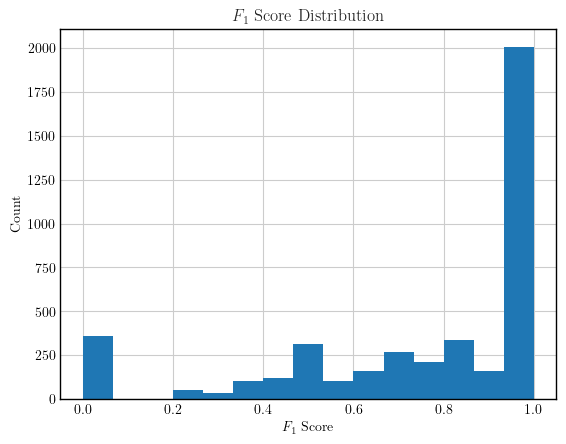

In [19]:
results.f1_scores.hist(bins=15)
plt.title("$F_1$ Score Distribution")
plt.xlabel("$F_1$ Score")
plt.ylabel("Count")
plt.savefig(OUTPUT_PATH/'f1_hist.svg')

In [20]:
plt.clf()

<Figure size 640x480 with 0 Axes>

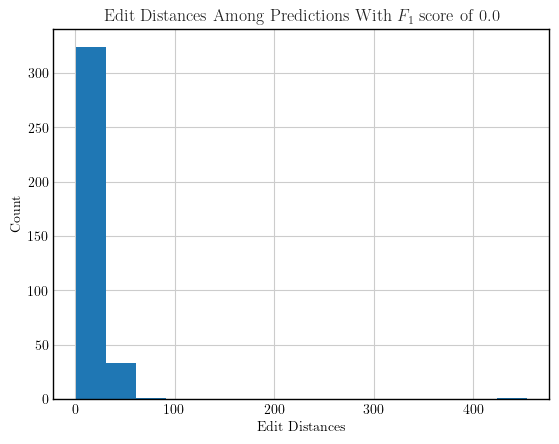

In [21]:
worst_finishes.med_scores.hist(bins=15)
plt.title("Edit Distances Among Predictions With $F_1$ score of 0.0")
plt.xlabel("Edit Distances")
plt.ylabel("Count")
plt.savefig(OUTPUT_PATH/'edit_dist.svg')

In [22]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [23]:
# sparse-bar formation of the same histogram data
ax = (
  worst_finishes
    .med_scores
    .sort_values()
    .map(lambda x: (x // 10) * 10)
    .map(lambda x: "[" + str(int(x)) + ", " + str(int(x+10)) + ")")
    .value_counts()
)
print(ax.to_latex())
print(ax.to_markdown())

\begin{tabular}{lr}
\toprule
{} &  med\_scores \\
\midrule
[0, 10)    &         130 \\
[10, 20)   &         108 \\
[20, 30)   &          82 \\
[30, 40)   &          29 \\
[40, 50)   &           7 \\
[50, 60)   &           1 \\
[60, 70)   &           1 \\
[450, 460) &           1 \\
\bottomrule
\end{tabular}

|            |   med_scores |
|:-----------|-------------:|
| [0, 10)    |          130 |
| [10, 20)   |          108 |
| [20, 30)   |           82 |
| [30, 40)   |           29 |
| [40, 50)   |            7 |
| [50, 60)   |            1 |
| [60, 70)   |            1 |
| [450, 460) |            1 |


<ipython-input-23-ff779c7471e7>:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ax.to_latex())


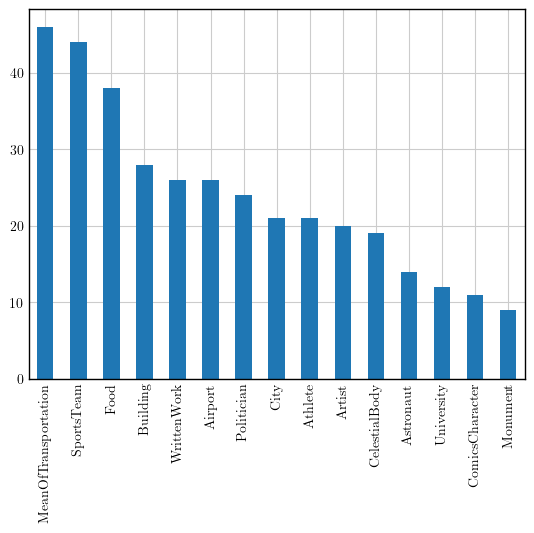

In [24]:
worst_finishes.category.value_counts().plot.bar()
plt.savefig(OUTPUT_PATH/'worst_finishes_cats.svg')

In [25]:
# normalized performance by category
plt.clf()
corpus = pd.read_pickle(root_path/'pipeline/normalized_data/webnlg_clean.pkl')
train_corpus = corpus[corpus.subset == 'train']
train_corpus.category.value_counts().plot.bar()
plt.clf()

<Figure size 640x480 with 0 Axes>

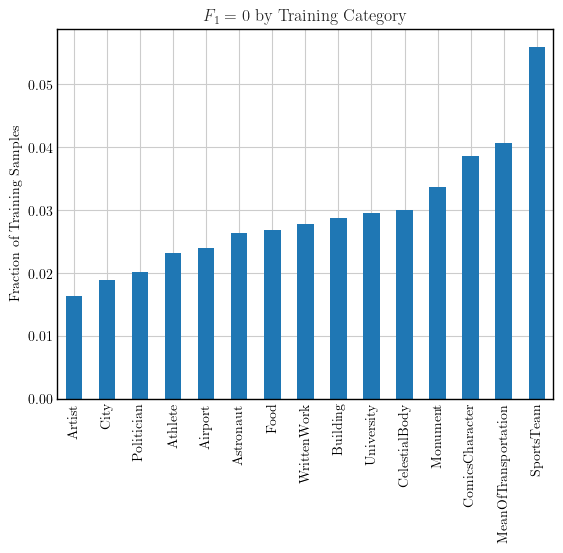

In [26]:
npc = worst_finishes.category.value_counts() / train_corpus.category.value_counts()
npc.sort_values().plot.bar()
plt.title("$F_1 = 0$ by Training Category")
plt.ylabel("Fraction of Training Samples")
plt.savefig(OUTPUT_PATH/'normalized_performance_by_cat.svg')

In [27]:
plt.clf()
worst_finishes.sort_values(by=['med_scores'])

,record_idx,seed_number,subset,category,split_index,sd,nl,task,input_ids,attention_mask,labels,pred_ids,decoded,f1_scores,med_scores,y_pred,y_true,y_len,nth_finish
45734,14663,0,test,City,168,"s2d 0: Albany, Georgia|area code|229","The area code for Albany, Georgia is 229.",s2d,"[37, 616, 1081, 21, 27119, 6, 5664, 19, 1630, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[3, 7, 357, 26, 3, 632, 10, 27119, 6, 5664, 91...","[0, 3, 7, 357, 26, 209, 10, 27119, 6, 5664, 91...","s2d 1: Albany, Georgia|area code|229.",0.0,1.000000,"{ALBANY,GEORGIA|AREACODE|229.}","{ALBANY,GEORGIA|AREACODE|229}",1,3865
12906,14789,2,test,Politician,294,s2d 2: Adam Holloway|residence|Gravesend,Adam Holloway lives in Gravesend.,s2d,"[7124, 28528, 9, 63, 1342, 16, 15199, 15, 7, 9...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[3, 7, 357, 26, 204, 10, 7124, 28528, 9, 63, 9...","[0, 3, 7, 357, 26, 209, 10, 7124, 28528, 9, 63...",s2d 1: Adam Holloway|residence|Gramesend,0.0,1.000000,{ADAMHOLLOWAY|RESIDENCE|GRAMESEND},{ADAMHOLLOWAY|RESIDENCE|GRAVESEND},1,3865
40762,14868,1,test,WrittenWork,373,s2d 1: Addiction (journal)|l c c n number|9364...,The Addiction journal has an LCCN number of 93...,s2d,"[37, 1980, 12472, 6378, 65, 46, 3, 6480, 10077...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 209, 10, 1980, 12472, 41, 2534...","[0, 3, 7, 357, 26, 209, 10, 1980, 12472, 41, 2...",s2d 1: Addiction (journal)|l c c n number|9345978,0.0,1.000000,{ADDICTION(JOURNAL)|LCCNNUMBER|9345978},{ADDICTION(JOURNAL)|LCCNNUMBER|93645978},1,3865
40764,14868,2,test,WrittenWork,373,s2d 2: Addiction (journal)|l c c n number|9364...,The LCCN number of Addiction journal is 93645978.,s2d,"[37, 3, 6480, 10077, 381, 13, 1980, 12472, 637...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 204, 10, 1980, 12472, 41, 2534...","[0, 3, 7, 357, 26, 209, 10, 1980, 12472, 41, 2...",s2d 1: Addiction (journal)|l c c n number|9345978,0.0,1.000000,{ADDICTION(JOURNAL)|LCCNNUMBER|9345978},{ADDICTION(JOURNAL)|LCCNNUMBER|93645978},1,3865
74956,14738,2,test,Food,243,s2d 2: United Kingdom|leader name|David Cameron,David Cameron is the leader of the United King...,s2d,"[1955, 18501, 19, 8, 2488, 13, 8, 907, 2671, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[3, 7, 357, 26, 204, 10, 907, 6524, 9175, 2290...","[0, 3, 7, 357, 26, 209, 10, 907, 2671, 2029, 9...",s2d 1: United Kingdon|leader name|David Cameron,0.0,1.000000,{UNITEDKINGDON|LEADERNAME|DAVIDCAMERON},{UNITEDKINGDOM|LEADERNAME|DAVIDCAMERON},1,3865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,14979,0,test,Building,484,s2d 0: Amdavad ni Gufa|location|Gujarat; Amdav...,The address of Amdavad ni Gufa is Lalbhai Dalp...,s2d,"[37, 1115, 13, 736, 26, 8644, 26, 3, 29, 23, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 736, 26, 8644, 26,...","[0, 3, 7, 357, 26, 209, 10, 736, 26, 8644, 26,...",s2d 1: Amdavad ni Gufa|address|Lalbhai Dalpatb...,0.0,44.500000,{AMDAVADNIGUFA|ADDRESS|LALBHAIDALPATBHAICAMPUS...,"{AMDAVADNIGUFA|LOCATION|GUJARAT, AMDAVADNIGUFA...",2,3865
16804,14632,0,test,Building,137,s2d 0: Dublin|leader name|Criona Ni Dhalaigh,Criona Ni Dhalaigh was Lord Mayor of Dublin.,s2d,"[9605, 106, 9, 2504, 309, 3828, 9, 9031, 47, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 14112, 9175, 22900...","[0, 3, 7, 357, 26, 209, 10, 9605, 106, 9, 2504...","s2d 1: Criona Ni Dhalaigh|office (worked at, w...",0.0,48.000000,"{CRIONANIDHALAIGH|OFFICE(WORKEDAT,WORKEDAS)|PR...",{DUBLIN|LEADERNAME|CRIONANIDHALAIGH},1,3865
25004,15691,0,test,Food,1196,s2d 0: Beef kway teow|country|Singapore; Beef ...,Beef kway teow is a popular dish in Singapore ...,s2d,"[10024, 89, 3, 157, 1343, 3, 17, 15, 2381, 19,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 7, 357, 26, 3, 632, 10, 10024, 89, 3, 157,...","[0, 3, 7, 357, 26, 209, 10, 10024, 89, 3, 157,...",s2d 1: Beef kway teo

<Figure size 640x480 with 0 Axes>

In [28]:
results[['med_scores','record_idx','f1_scores']].to_csv(OUTPUT_PATH/'results.csv')
y_true.to_csv(OUTPUT_PATH/'y_true.csv')
y_pred.to_csv(OUTPUT_PATH/'y_pred.csv')
worst_finishes.to_csv(OUTPUT_PATH/'worst_finishes.csv')

In [29]:
results.describe()

,record_idx,seed_number,split_index,f1_scores,med_scores,y_len,nth_finish
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,15306.636600,0.902462,811.636600,0.753922,16.358941,2.941998,1586.796402
std,454.419137,0.838034,454.419137,0.312532,12.588262,1.477015,1573.099283
min,14495.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,14929.000000,0.000000,434.000000,0.571429,10.000000,2.000000,0.000000
50%,15311.000000,1.000000,816.000000,0.888889,17.211111,3.000000,2029.000000
75%,15697.250000,2.000000,1202.250000,1.000000,22.400000,4.000000,3141.000000
max,16094.000000,7.000000,1599.000000,1.000000,454.200000,7.000000,3865.000000
